# Coins detection

**Name:** Renusri Naraharashetty
    
**Reg No:** 212223240139
    
**Slot:** 4I5-2

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = cv2.imread('CoinsA.png')  

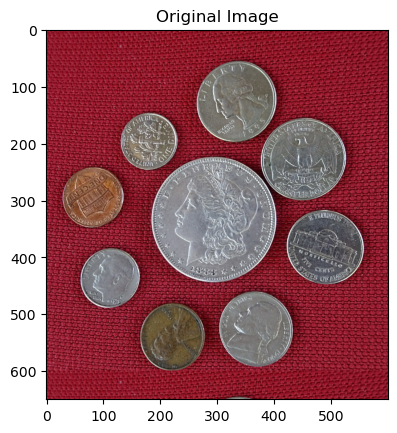

In [3]:
imageCopy = image.copy()
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.show()

# Convert Image to Grayscale¶

In [4]:
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

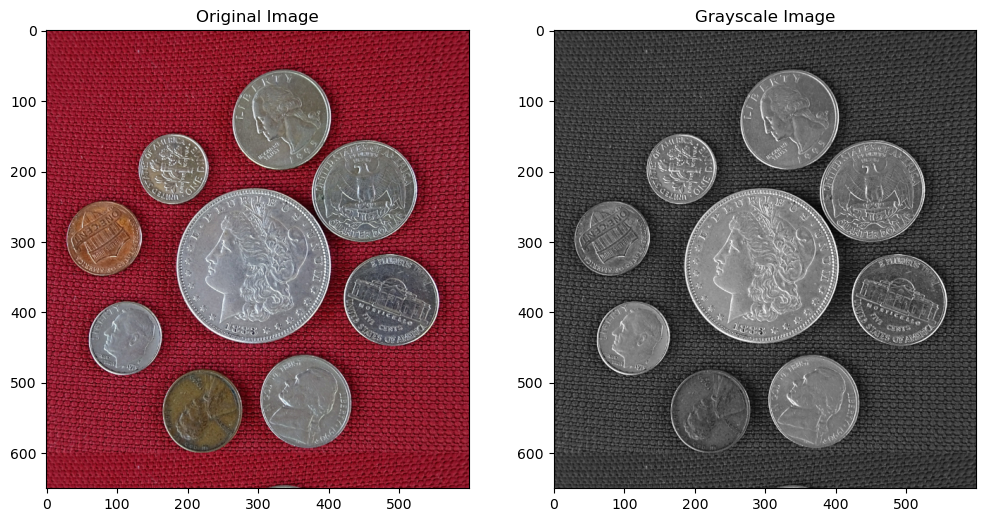

In [5]:
plt.figure(figsize=(12,12))
plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(122); plt.imshow(imageGray,cmap='gray');plt.title("Grayscale Image"); plt.show()

# Split Image into R,G,B Channels

In [6]:
imageB, imageG, imageR = cv2.split(image)

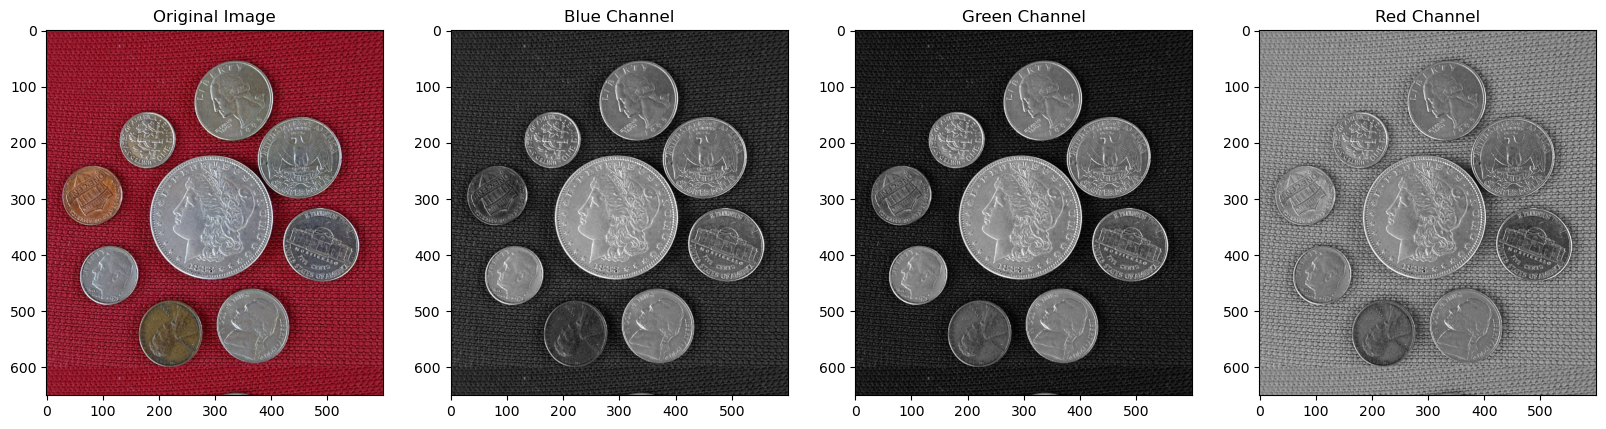

In [7]:
plt.figure(figsize=(20,12))
plt.subplot(141);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(142);plt.imshow(imageB,cmap='gray');plt.title("Blue Channel")
plt.subplot(143);plt.imshow(imageG,cmap='gray');plt.title("Green Channel")
plt.subplot(144);plt.imshow(imageR,cmap='gray');plt.title("Red Channel");
plt.show()

# Perform Thresholding

In [8]:
_, imageThresholded = cv2.threshold(imageG, 20, 255, cv2.THRESH_BINARY_INV)

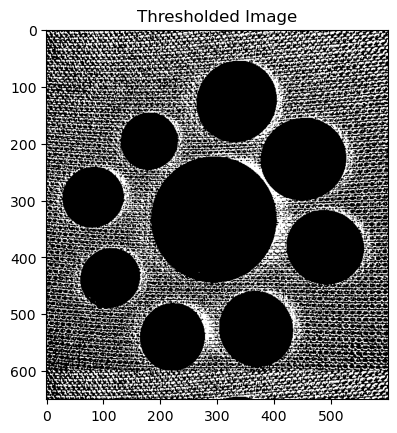

In [9]:
plt.imshow(imageThresholded, cmap='gray');plt.title('Thresholded Image');plt.show()

# Perform morphological operations

Text(0.5, 1.0, 'Dilated image')

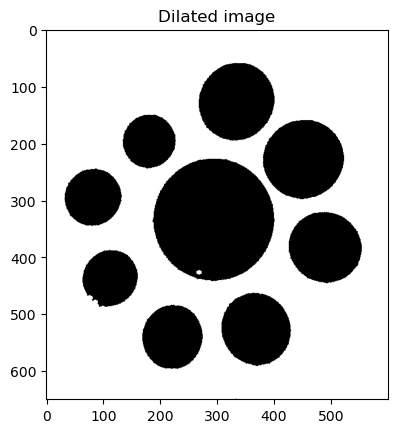

In [10]:
kernel=(5,5)
kernel2=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,kernel)
Dilatedimg=cv2.dilate(imageThresholded,kernel2,iterations=2)
plt.imshow(Dilatedimg, cmap='gray')
plt.title("Dilated image")

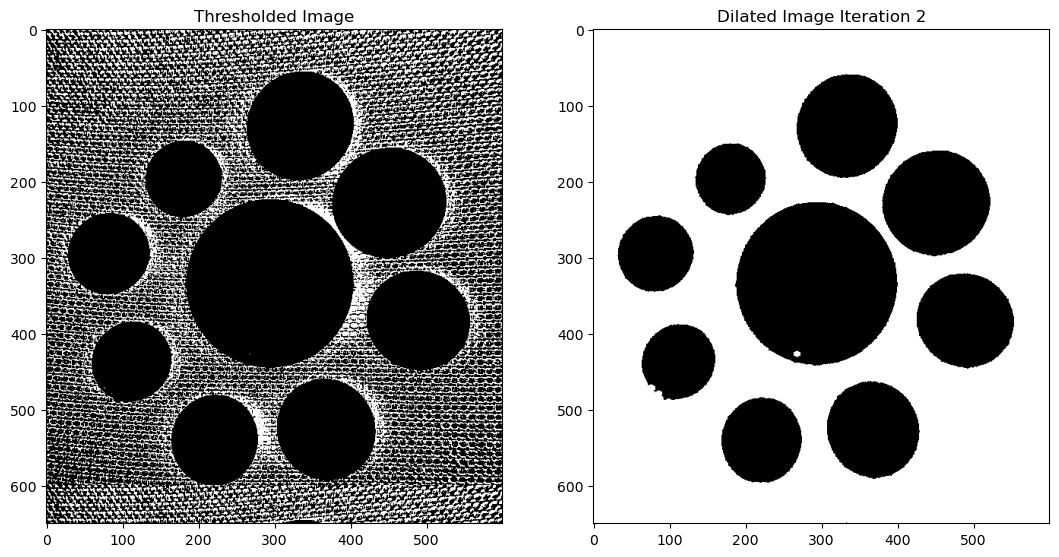

In [11]:
plt.figure(figsize=(20,12))
plt.subplot(131);plt.imshow(imageThresholded,cmap='gray');plt.title("Thresholded Image")
plt.subplot(132);plt.imshow(Dilatedimg,cmap='gray');plt.title("Dilated Image Iteration 2")
plt.show()

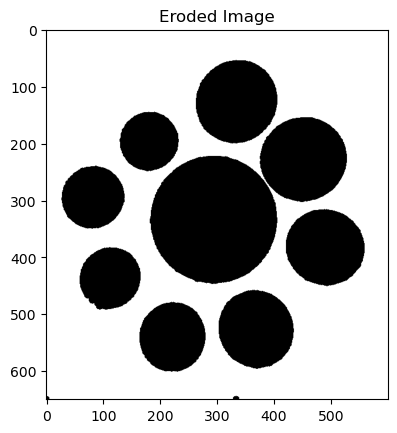

In [12]:
kernel=(11,11)
kernel2=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,kernel)
imageEroded = cv2.erode(Dilatedimg, kernel2)
plt.imshow(imageEroded,cmap='gray');plt.title("Eroded Image");plt.show()

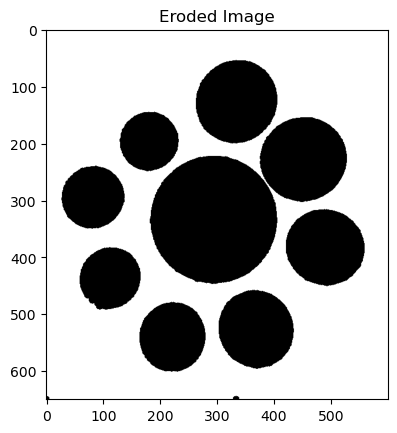

In [13]:
plt.imshow(imageEroded, cmap='gray');plt.title("Eroded Image");plt.show()

#  Create SimpleBlobDetector

In [14]:
params = cv2.SimpleBlobDetector_Params()

params.blobColor = 0

params.minDistBetweenBlobs = 2

params.filterByArea = False

params.filterByCircularity = True
params.minCircularity = 0.8

params.filterByConvexity = True
params.minConvexity = 0.8

params.filterByInertia =True
params.minInertiaRatio = 0.8

In [15]:
detector = cv2.SimpleBlobDetector_create(params)

# Detect Coins

In [16]:
keypoints = detector.detect(imageEroded)

In [17]:
print(f"Number of coins detected: {len(keypoints)}")

Number of coins detected: 9


In [18]:
for k in keypoints:
    x,y=k.pt
    x=int(round(x))
    y=int(round(y))
    
    cv2.circle(image, (x,y),5,(255,0,0),-1)
    diameter=k.size
    radius=int(round(diameter/2))
    
    cv2.circle(image,(x,y),radius,(255,0,0),2)

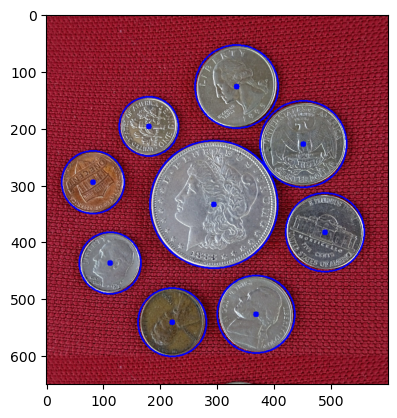

In [19]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))